PACKAGES AND DEPENDENCIES

In [96]:
!pip install tensorflow opencv-python matplotlib

In [7]:
import os
import tensorflow as tf

In [8]:

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Configure GPU to run without using full VRAM

In [9]:
import cv2
import imghdr
from matplotlib import pyplot as plt

# Import OpenCV and IMGHDR, which checks image type of input


Data Loading


In [10]:
data_dir = 'data'

In [11]:
os.listdir(os.path.join(data_dir, 't_shirt'))

['029032_55_basict_f1_700x700.png',
 '1-1.png',
 '10236558_11.jpg',
 '13-5.jpg',
 '1410760800_1_1_16.jpg',
 '19-2.jpg',
 '1_hero-image.jpg',
 '2-58ee7a7323cd6f2385fcaacfa1388cb9107e4ffbdb22bdb7ba9b0eedf04cd42f.jpg',
 '2_eight-top-t-shirt-design-tips.jpg',
 '3-c2852f97b1a11c0dd9a9b89c923537e890bbb3e942722a60b2777f687b629635.jpg',
 '3611220-01-2.jpg',
 '3611849-02-5.jpg',
 '3611849-13-5.jpg',
 '38189-1.jpg',
 '4000_BLACK_3.jpg',
 '41dMZQBmyZL._AC_UY1000_.jpg',
 '41uF42-1WwL._AC_UY1000_.jpg',
 '47175120250-e1.jpg',
 '51Cz5X02JqL._AC_UY1000_.jpg',
 '51ulmT3YUZL._AC_UY1000_.jpg',
 '5444528_d4e3_5.jpg',
 '711iSQbPWpL._AC_UY1000_.jpg',
 '76020_EBR.jpg',
 '911n4nIhnpL._AC_UY1000_.jpg',
 'a6divabouyfx34swkq5t79ypadvgiml9ajl08aq8rhxusdkx.png.png',
 'alized---gifts-for-dad-mom-s-gifts-papy-s-gift-grandma-s-gifts-add-my-photos.jpg',
 'All-American-Clothing-Co.----60-40-T-Shirt-TTycoon-1651086944_1200x.jpg',
 'Best-White-Shirts-New-2-Gear.jpg',
 'BG_OF_05105_Undyed_FW23_13228.jpg',
 'black-front__9

In [12]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
# img = cv2.imread(os.path.join(data_dir, 't_shirt', '76020_EBR.jpg'))
# img.shape

# Reads in image to numpy array
# Prints out the dimensions of the image

# plt.imshow(img)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()

# Plots the image
# Plots the image after converting from OpenCV BGR scheme to RGB scheme

In [13]:
for img_class in os.listdir(data_dir):
    # button_shirt, t-shirt, pants, etc
    for img in os.listdir(os.path.join(data_dir, img_class)):
        # Every image in class directories
        img_path = os.path.join(data_dir, img_class, img)
        # Individual image path
        
        try:
            img = cv2.imread(img_path)
            # Open up an image
            tip = imghdr.what(img_path)
            # Image extension
            if tip not in image_exts:
                print("Image not in the extension list {}".format(img_path))
                os.remove(img_path)

                # If image format doesn't exist in the extension list, 
                # remove the image and it's path
        
        except Exception as e:
            print('Issue with image {}'.format(img_path))
            # os.remove(img_path)

In [14]:
import numpy as np

In [105]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [15]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size = 32)

# Load images onto data

Found 851 files belonging to 6 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

# Instantiates numpy iterator that will sequentially batch data

In [17]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000001D836C78170>)

In [18]:
batch = data_iterator.next()

    # Get batch from iterator

In [19]:
len(batch)

# Shows the length of the batch generated

2

In [20]:
batch[0].shape

# Images represented as numpy arrays

(32, 256, 256, 3)

In [21]:
batch[1]

# Prints each image batch represented as [0,14] to correspond to the correct class

array([0, 1, 0, 1, 1, 1, 0, 4, 4, 2, 3, 0, 4, 4, 3, 3, 1, 1, 0, 1, 0, 1,
       4, 1, 4, 1, 5, 5, 0, 0, 2, 1])

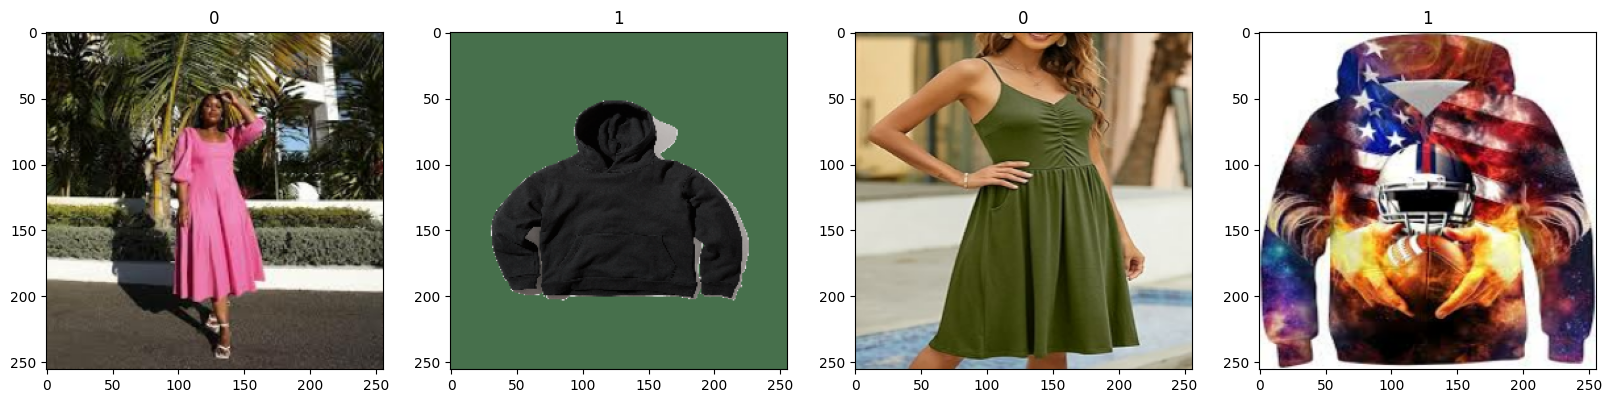

In [22]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


# Print four images from the batch

In [23]:
data = data.map(lambda x,y: (x/255, y))

# .map applies formatting to all images in pipeline, performs transformation on x variable (division)
# x represents images
# y represents target variables (classes)

In [24]:
data.as_numpy_iterator().next()[0]

# IF values look off (i.e not in range [0,1]), you probably ran the division function twice
# Reload the data, grab another batch, plot, normalize, then run this code again

array([[[[0.57800245, 0.5701593 , 0.5740809 ],
         [0.64362746, 0.6357843 , 0.6397059 ],
         [0.70778185, 0.7004289 , 0.70251226],
         ...,
         [0.81911767, 0.8043505 , 0.7922794 ],
         [0.8081495 , 0.79246324, 0.78069854],
         [0.7872549 , 0.78333336, 0.7676471 ]],

        [[0.57058823, 0.5627451 , 0.56666666],
         [0.63480395, 0.6269608 , 0.6308824 ],
         [0.69914216, 0.691299  , 0.6952206 ],
         ...,
         [0.8070466 , 0.8099877 , 0.7908701 ],
         [0.79172796, 0.7760417 , 0.764277  ],
         [0.80018383, 0.78449756, 0.77273285]],

        [[0.5704657 , 0.56262255, 0.5665441 ],
         [0.6460784 , 0.6382353 , 0.64215684],
         [0.6929534 , 0.6851103 , 0.68903184],
         ...,
         [0.7913603 , 0.7934436 , 0.7747549 ],
         [0.78811276, 0.77389705, 0.76164216],
         [0.7941176 , 0.779902  , 0.7676471 ]],

        ...,

        [[0.6279412 , 0.625     , 0.6156863 ],
         [0.6074142 , 0.5985907 , 0.6074142 ]

In [25]:
print(len(data))

27


In [26]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2) + 1
test_size = int(len(data) * 0.1)

In [27]:
train_size + val_size + test_size

# train = 52 batches * 32 images / batch = 1664 images
# val = 16 batches * 32 images / batch = 512 images
# test = 7 batches * 32 images / batch = 224 images

26

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# .take allocates the batch size into respective set
# .take skips the previous and takes the remaining batches of the partition

TRAINING

In [29]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [30]:
model = Sequential()

model.add(Conv2D(32, (3,3), 1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

# 1 denotes stride size for Convolution
# Default maxpooling is a (2,2) grid size

model.add(Conv2D(64, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))

C:\Users\Raj\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665,158 (25.43 MB)

 Trainable params: 6,665,158 (25.43 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,665,158 (25.43 MB)

 Trainable params: 6,665,158 (25.43 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

# Creates space to place log model training for future performance

In [35]:
history = model.fit(train, epochs = 15, validation_data = val, callbacks = [tensorboard_callback])

# Add steps_per_epoch and val_steps for fitting (i.e. how many iterations are needed for one epoch to be completed)

Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.2164 - loss: 1.8121 - val_accuracy: 0.3021 - val_loss: 1.7488
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.2553 - loss: 1.7304 - val_accuracy: 0.3490 - val_loss: 1.6278
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.2970 - loss: 1.6378 - val_accuracy: 0.3802 - val_loss: 1.6207
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.3991 - loss: 1.4934 - val_accuracy: 0.4948 - val_loss: 1.4073
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5890 - loss: 1.1583 - val_accuracy: 0.6406 - val_loss: 1.1030
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7004 - loss: 0.8836 - val_accuracy: 0.6615 - val_loss: 0.9571
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7728 - loss: 0.6507 - val_accuracy: 0.7292 - val_loss: 0.7473
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8629 - loss: 0.3900 - val_accuracy: 0.8333 - val_loss:

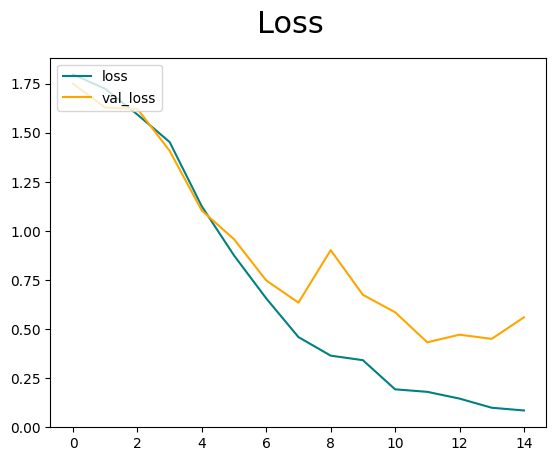

In [36]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 22)
plt.legend(loc = 'upper left')
plt.show()

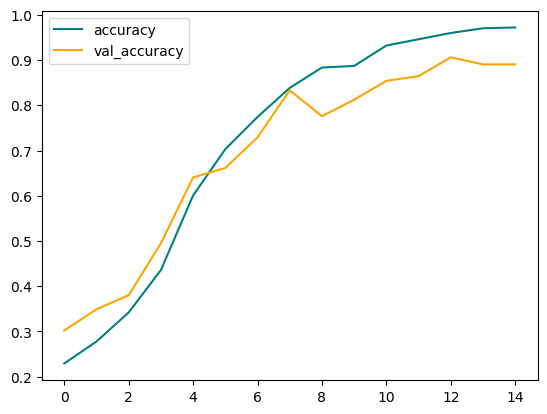

In [37]:
##### fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 22)
plt.legend(loc = 'upper left')
plt.show()

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
precision = Precision()
recall = Recall()
acc = BinaryAccuracy()

In [40]:
len(test)

2

In [57]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    #precision.update_state(y, yhat)
    ##recall.update_state(y, yhat)
    ##acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


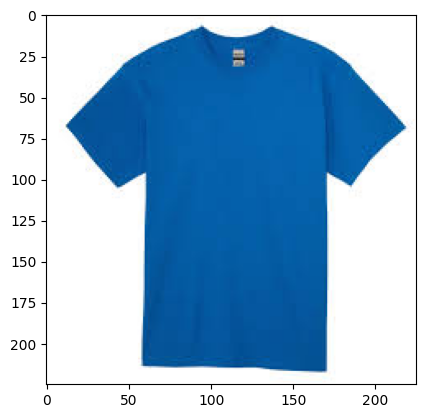

In [58]:
img = cv2.imread("download.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

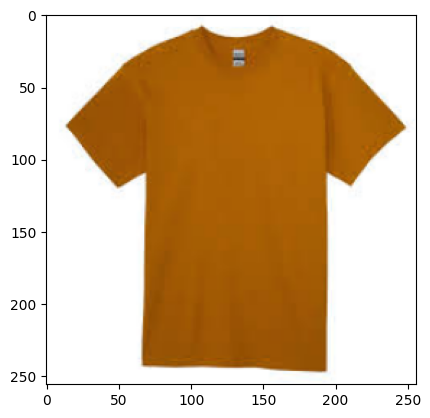

In [59]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [65]:
resize.shape

TensorShape([256, 256, 3])

In [66]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [67]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [71]:
yhat

array([[1.9604687e-09, 2.7738251e-06, 2.5492562e-07, 2.1090733e-12,
        3.6801881e-12, 9.9999702e-01]], dtype=float32)

In [75]:
import tensorflow.keras.models
from tensorflow.keras.models import load_model

In [76]:
model.save(os.path.join('model', 'clothingclassifierbeta.h5'))

#Serialization function

In [78]:
new_model = load_model(os.path.join('model', 'clothingclassifierbeta.h5'))

In [80]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


array([[1.9604687e-09, 2.7738251e-06, 2.5492562e-07, 2.1090733e-12,
        3.6801881e-12, 9.9999702e-01]], dtype=float32)